In [1]:
import pandas as pd
import numpy as np

url = 'https://github.com/dnnnam188/dataset/raw/main/data.xlsx'
data = pd.read_excel(url) # đọc data
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

data_n = data.drop(['No'], axis=1)

data_n.info()# hiển thị thông tin tổng quan về dữ liệu để kiểm tra dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [13]:
#Sử dụng phương pháp phân vị để loại bỏ outliers từ dữ liệu
#Tính phân vị
dt_low = data['Y house price of unit area'].quantile(0.01)# phân vị thấp là giá trị nhỏ nhất so với các dữ liệu còn lại(99% dữ liệu còn lại)
dt_hi = data['Y house price of unit area'].quantile(0.99)# phân vị cao là giá trị lớn nhất so với các dữ liệu còn lại.
#Loại bỏ outliers
data_fil = data[(data['Y house price of unit area'] >= dt_low) & (data['Y house price of unit area'] <= dt_hi)]
#data_fil là một dataframe chứa các gía trị trong khoảng từ dl_low đến dt_hi để loại bỏ các giá trị nằm ngoài khoảng phân vị
data_fil.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


<Figure size 1500x800 with 0 Axes>

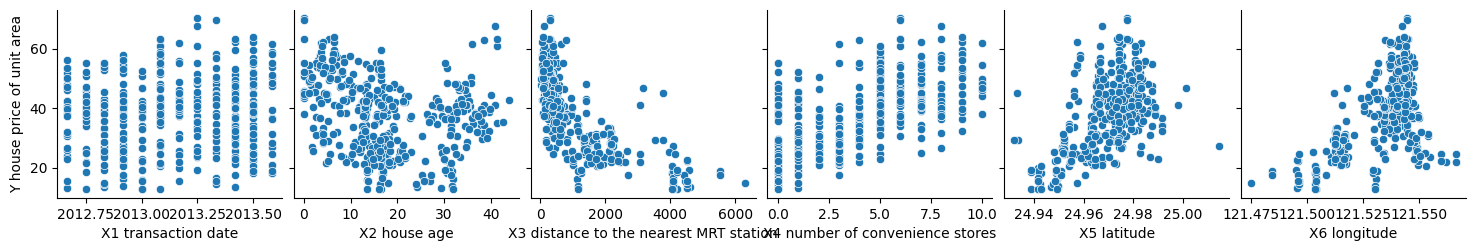

In [14]:
# Đặt lại kích thước của đồ thị
plt.figure(figsize=(15, 8))

# Tạo biểu đồ phân tán để có cái nhìn trực quan giữa các đặc trưng
sns.pairplot(data_fil,x_vars =['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude'], y_vars='Y house price of unit area', kind='scatter')
plt.show()

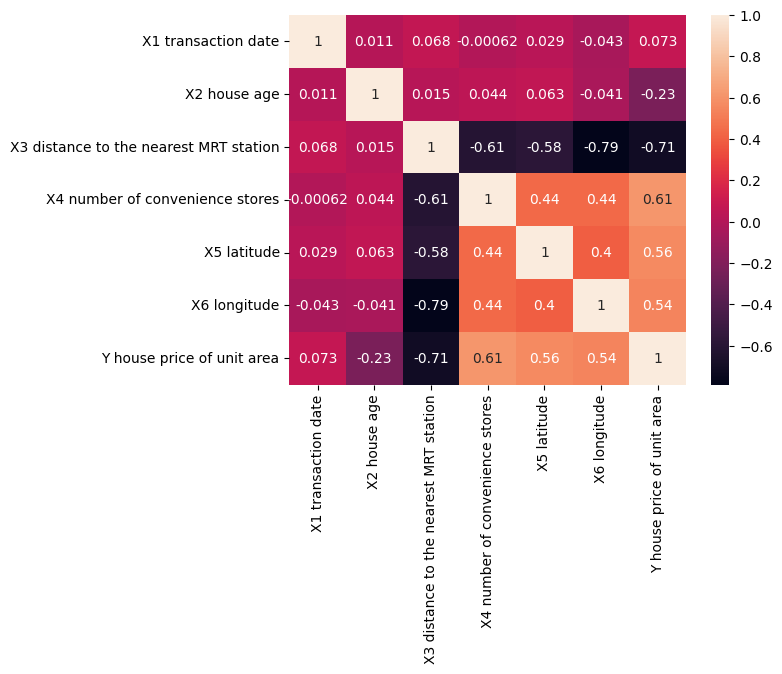

In [15]:
data_cleaned = data_fil.drop('No', axis=1)
sns.heatmap(data_cleaned.corr(),annot = True ) # Vẽ heatmap
plt.show()

Qua heatmap ở trên chúng ta thấy x1 có độ tương quan với biên mục tiêu Y house price of unit area là khá thấp(0.073) nên lược bỏ X1 transaction date trước khi đưa vào để kiểm thử mô hình


In [16]:
X = data_cleaned.drop(['Y house price of unit area','X1 transaction date'], axis = 1).values # Lược bỏ thuộc tính mục tiêu và X1 transaction gán vào biến X
Y = data_cleaned['Y house price of unit area'].values #Tách thuộc tính mục tiêu và gán vào Y

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) # Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra

In [18]:
from sklearn.linear_model import LinearRegression
#Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)#Dùng hàm fit của thư viện sklearn để xây dựng mô hìnhfrom sklearn.linear_model import LinearRegression
#Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)#Dùng hàm fit của thư viện sklearn để xây dựng mô hình

LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#Dự đoán
y_train_pred = model.predict(X_train) #Tính y_train_pred dự đoán với X_train bằng predict() của model LR
y_test_pred = model.predict(X_test) #Tính y_test_pred dự đoán với X _test bằng predict() của model LR

#Tính MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

#TÍnh MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

#Tính R2_squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test,y_test_pred)
#Tính RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)


print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training R2 score:", train_r2)
print("Testing R2 score:", test_r2)
print("Training RMSE:",train_rmse)
print("Testing RMSE:",test_rmse)


Training MSE: 57.30240720825469
Testing MSE: 44.63317586434433
Training MAE: 5.757276865724056
Testing MAE: 5.349374533375277
Training R2 score: 0.627945316776428
Testing R2 score: 0.6887129050227272
Training RMSE: 7.569835348820653
Testing RMSE: 6.680806527983304




---Training MSE là 57.3 và Testing MSE là 44.63; MSE cho biết mức đọ chính xác của mô hình=> Kết quả dự đoán giá nhà ở mức trung bình.


---Training MAE là 5.75 và Testing MSE là 5.34 biểu thị độ lớn trung bình của sai số tuyệt đối khá nhỏ


---Training R2 score là 0.63 và Testing R2 score là 0.69 biểu thị sự biến thiên biến động của mô hình, số điểm tương đối ổn.



---Training RMSE là 7.57 và Testing RMSE là 6.68 biểu thị mức độ của các điểm dữ liệu được quan sát với các giá trị dự đoán ở đây RMSE còn hơi cao.
=> Mô hình LR dự đoán có kết quả tương đối tốt nhưng cần phải cải thiện hiệu xuất của dự đoán.





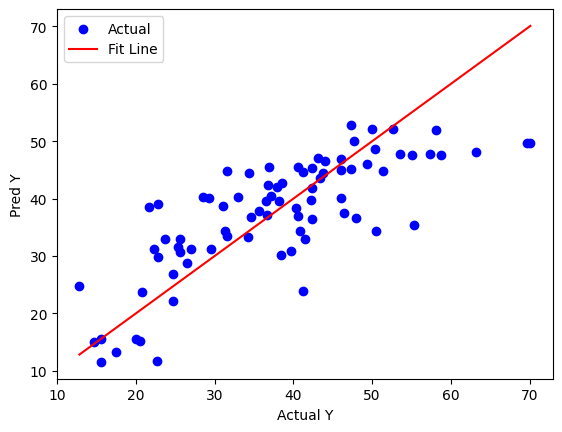

In [12]:
#Trực quan hóa giá nhà thực tế so với giá dự đoán để hiểu rõ hiệu suất của mô hình một cách trực quan.
plt.scatter(y_test, model.predict(X_test), color='blue', label='Actual')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Fit Line')
#Điểm đầu tiên là minimum của y_test và điểm thứ 2 là điểm maximum của y_test để vẽ fit line

plt.xlabel('Actual Y')
plt.ylabel('Pred Y')
plt.legend()

plt.show()

**Conclusion:**

Hiệu suất dự đoán:

---Mô hình chưa đạt được hiệu xuất cao trong việc dự đoán giá nhà dựa vào các thuộc tính.

--- Các số liệu thu được không được ổn gây ra một số những sai sót khi dự đoán giá nhà.

Hạn chế


---Mô hình giả định mỗi quan hệ tuyến tính giữa các features và biến mục tiêu. Do đó nếu dataset đó có các biến có mối quan hệ  tuyến tính có thể không thể mô phỏng được mỗi quan hệ giữa các biến

---Có  thể kết hợp các mô hình học máy khác với hồi quy để có thể cải thiện được hiệu suất làm việc.
